<a href="https://colab.research.google.com/github/jdariasl/ML_2020/blob/master/Labs/lab2/lab2_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras alamancenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [1]:
#configuración del laboratorio
# Ejecuta esta celda!
%load_ext autoreload
%autoreload 2
# for local 
#import sys ; sys.path.append('../commons/utils/')
!wget https://raw.githubusercontent.com/jdariasl/ML_2020/master/Labs/commons/utils/general.py -O general.py
from general import configure_lab2
configure_lab2()
from lab2 import *
GRADER, x, y = part_2()

--2020-10-19 06:58:19--  https://raw.githubusercontent.com/jdariasl/ML_2020/master/Labs/commons/utils/general.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13949 (14K) [text/plain]
Saving to: ‘general.py’

general.py          100%[===================>]  13.62K  --.-KB/s    in 0.03s   

2020-10-19 06:58:20 (508 KB/s) - ‘general.py’ saved [13949/13949]

lab configuration started
installing libraries
downloading files
lab configured


# Laboratorio 2 - Parte 2



## Ejercicio 1: Contextualización del problema

Para el problema de regresion usaremos la base de datos 'The Boston Housing Dataset', cuya descripción [pueden encontrarla aqui](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). La información ya esta cargada dentro del notebook

In [2]:
print("muestra de los 3 primeros renglones de x:\n", x[0:3, :])
print("muestra de los 3 primeros renglones de y:\n", y[0:3])
print ("¿el resultado de esta instrucción que información nos brinda?", x.shape[0])
print ("¿el resultado de esta instrucción que información nos brinda?", x.shape[1])
print ("¿el resultado de esta instrucción que información nos brinda?", len(np.unique(y)))

muestra de los 3 primeros renglones de x:
 [[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]]
muestra de los 3 primeros renglones de y:
 [24.  21.6 34.7]
¿el resultado de esta instrucción que información nos brinda? 506
¿el resultado de esta instrucción que información nos brinda? 13
¿el resultado de esta instrucción que información nos brinda? 229


En los problemas de regresión, es muy util explorar la distribución de la variable objetivo. Nuestro primer ejercicio consiste en:
1. visualizar un histograma de la variable y 
2. retornar los intervalo de datos mas frecuente.

Pistas: 
1. explorar la documentación de [plt.hist](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html). Maneje los valores por defecto. ¿como se puede usar la salida del histograma para retorna el intervalo de datos mas frecuente?
2. ¿ `np.argsort(numpy_array)[::-1]` que efecto tiene?

In [3]:
#ejercicio de código
def plot_hist_and_get_freq_int(Y):
    """función que grafica el histograma de la variable 'Y'
        y retorna el intervalo donde ocurren con mas frecuencia los
        valores de 'Y'
        Y: numpy array con la variable a graficar
        retorna: una tupla (int/float, int/float, int/float) 
            el primer elemento es al limite inferior del intervalo donde ocurren los valores
            mas frecuentes
            el segundo elemento es al limite superior del intervalo donde ocurren los valores
            mas frecuentes
            el tercer elemento es el la frecuencia del intervalo
            va observar un cuarto elemento a retornar, el cual es usado para confirmar que
            se realizo la grafica correctamente
    """
    n,bins,_=plt.hist(Y)
    order=np.argsort(n)[::-1]
    lim_inf = bins[order[0]]
    print(order,bins)
    lim_sup = bins[order[0]+1]
    freqs =n[order[0]]
    
    # el cuarto elemento debe dejarlo
    return (lim_inf, lim_sup, freqs, plt.gcf())

[0 3 2 1 5 9 4 6 8 7] [12.7  15.05 17.4  19.75 22.1  24.45 26.8  29.15 31.5  33.85 36.2 ]
[5 9 8 7 6 4 3 2 1 0] [0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5]
TEST EXITOSO!


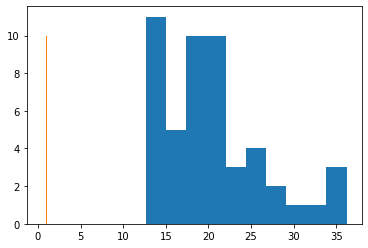

In [4]:
## la funcion que prueba tu implementacion
#ignora las graficas!!
GRADER.run_test("ejercicio1", plot_hist_and_get_freq_int)

[3 4 2 1 5 6 9 0 8 7] [ 5.   9.5 14.  18.5 23.  27.5 32.  36.5 41.  45.5 50. ]


(18.5, 23.0, 154.0, <Figure size 432x288 with 1 Axes>)

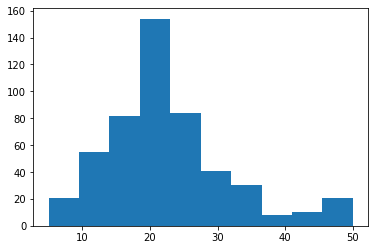

In [5]:
# ver el histograma!
plot_hist_and_get_freq_int(y)

In [6]:
#@title Pregunta Abierta
#@markdown ¿evaluando **solo** el histograma, podria decirse que nuestra variable 'y' podria modelarse de manera **totalmente exacta** con una sola distribución de probabilidad gausiana? justifique su respuesta
respuesta_1 = "No es posible modelarse de manera \"totalmente exacta\"  porque al final del histograma es posible ver como las frecuencias vuelven incrementar despu\xE9s de que empezaran a disminuirse, para hacerlo ser\xEDa necesario otra gausiana." #@param {type:"string"}

## Ejercicio 2: Completar código de K-Vecinos para regresión.

Vamos a implementar ahora KNN para un problema de regresión.

Las mismas pistas de nuestro laboratorio anterior son de utilidad para implementar el algoritmo.

1. Para el cáculo de la distancia entre vectores existen varias opciones:
    1. usar la función la distancia entre matrices `scipy.spatial.distance.cdist`([Ejemplo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html#scipy.spatial.distance.cdist))--esta puede ser usada directamente como `cdist(...)`. Entiende la salida de esta función. Al usarla, se logra un rendimiento superior.
    2. usar la función la distancia euclidiana `scipy.spatial.distance.euclidean`([Ejemplo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.euclidean.html))--pueder acceder a ella directamente como `euclidean`. Aca debe pensar en un algoritmo elemento a elemento, por lo tanto menos eficiente.
2. También serán de utilidad las funciones `np.sort` y `np.argsort`.
3. ¿cual es la unica diferencia entre el knn para clasificación y regresión? en lugar de la moda, que metodo debemos usar?

In [7]:
#ejercicio de código
def KNN_regresion(X_train, Y_train, X_test, k):
    """ Funcion que implementa el modelo de K-Vecino mas cercanos
        para regresión
    X_train: es la matriz con las muestras de entrenamiento
    Y_train: es un vector con los valores de salida pra cada una de las muestras de entrenamiento
    X_test: es la matriz con las muestras de validación
    k (int): valor de vecinos a usar
    retorna: las estimaciones del modelo KNN para el conjunto X_test 
             esta matriz debe tener un shape de [row/muestras de X_test] 
             y las distancias de X_test respecto a X_train, estan matrix
             debe tener un shape de [rows de X_test, rows X_train]
             lo que es lo mismo [muestras de X_test, muestras de X_train]
    """
    
    if k > X_train.shape[0]:
        print("k no puede ser menor que las muestras de entrenamiento")
        return(None)

    distancias =  cdist(X_test, X_train)
    Yest = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
      vecinos_index= np.argsort(distancias[i])[:k]
      vecinos_value = np.take(Y_train, vecinos_index) 
      Yest[i]=np.sum(vecinos_value)/k
  
        
    return Yest, distancias

In [8]:
## la funcion que prueba tu implementacion
GRADER.run_test("ejercicio2", KNN_regresion)

TEST EXITOSO!


## Ejercicio 3: Experimentos con KNN

Ahora vamos a probar nuestro algoritmo. Antes de ello, definos la función para calcular el error

In [9]:
def MAPE(Y_est,Y):
    """Mean Absolute Percentage Error para los problemas de regresión
    Y_est: numpy array con los valores estimados
    Y: numpy array con las etiquetas verdaderas
    retorna: mape
    """
    N = np.size(Y)
    mape = np.sum(abs((Y_est.reshape(N,1) - Y.reshape(N,1))/Y.reshape(N,1)))/N
    return mape 

Y ahora, si, vamos a crear la función para experimentar.

En el ejercicio de código, se puede observar que usamos nuevamente la funciónes de la libreria **sklearn**:

1. [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) para normalizar.

2. [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Para dividir el conjunto de datos. Entiende como estamos usando esta función.

In [10]:
#@title Pregunta Abierta
#@markdown si bien, dentro del código es usada la función train_test_split, que metodologia de validación es implementada usando esta función? justifique
respuesta_2 = "La metodolog\xEDa de validaci\xF3n implementada es validaci\xF3n bootstraping ya que se realizan varias iteraciones para cada 'K' y en cada una se entrena y valida  con conjuntos de datos aleatorios generados en el train_test_split." #@param {type:"string"}

In [11]:
#Ejercicio de código
def experimentar (X, Y, ks):
    """Función que realiza los experimentos con knn usando
       una estrategia de validacion entrenamiento y pruebas
    X: matriz de numpy conjunto con muestras y caracteristicas
    Y: vector de numpy con los valores a predecir
    ks: List[int/float] lista con los valores de k-vecinos a usar
    retorna: dataframe con los resultados, debe contener las siguientes columnas:
        - los k-vecinos, el error-mape medio de prueba, la desviacion estandar del error-mape
    """
    
    resultados = pd.DataFrame()
    idx = 0
    # iteramos sobre la lista de k's
    for k in ks:
        # lista para almacenar los errores de cada iteración
        # de la validación
        error_temp = []
        
        # iteramos para validar
        for j in range(3): 
            # dividimos usando la función
            Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y)
            scaler = StandardScaler()
            scaler.fit(Xtrain)
            Xtrain= scaler.transform(Xtrain)
            Xtest = scaler.transform(Xtest)

            Yest, distances = KNN_regresion(Xtrain, Ytrain, Xtest, k)
            errorTest = MAPE(Yest,Ytest)
            error_temp.append(errorTest)
    
        resultados.loc[idx,'k-vecinos'] = k 
        resultados.loc[idx,'error de prueba(media)'] = np.mean(error_temp)
        resultados.loc[idx,'error de prueba(desviación estandar)'] = np.std(error_temp)
        idx+=1

    return (resultados)

In [12]:
## la funcion que prueba tu implementacion
GRADER.run_test("ejercicio3", experimentar)

TEST EXITOSO!


Ahora ejecuta los experimentos con k = 2,3,4,5,6,7,10

In [13]:
resultados = experimentar (x, y,[2,3,4,5,6,7,10])
resultados

,k-vecinos,error de prueba(media),error de prueba(desviación estandar)
0,2.0,0.131557,0.013047
1,3.0,0.135688,0.000928
2,4.0,0.138449,0.002752
3,5.0,0.135378,0.011910
4,6.0,0.141112,0.010318
5,7.0,0.131526,0.012911
6,10.0,0.142272,0.008123


## Ejercicio 4: Ventana de Parzen y experimentos

Ahora, igualmente, vamos aplicar ventana de parzen para resolver el problema de regresión.

$$f({\bf{x}}^*) = \frac{1}{N h^d} \sum_{i=1}^{N} K(u_i), \;\; u_i = \frac{d({\bf{x}}^*,{\bf{x}}_i)}{h}$$

En la siguiente celda se define la función para un $K(u_i)$ gaussiano y se realiza la sugerencia para estimar el termino $ \sum_{i=1}^{N} K(u_i)$, siendo $\;\; u_i = \frac{d({\bf{x}}^*,{\bf{x}}_i)}{h}$. 

Observa y entiende esta última función y sus argumentos. Recordando que para regresión, debemos usar la relación de **Nadaraya_Watson**.

$$y^* = \frac{\sum_{i=1}^N K(u_i)y_i}{\sum_{i=1}^N K(u_i)} $$



In [14]:
def kernel_gaussiano(x):
    return (np.exp((-0.5)*x**2))

def ParzenWindow(x,Data,h,Datay=None):
    """"ventana de parzen
    x: vector con representando una sola muestra
    Data: vector de muestras de entrenamiento
    h: ancho de la ventana de kernel
    Datay: vector con los valores de salida (y), Si no se pasa como argumento, 
        se calcula un ventana de parzen sin multiplicar los valores de este vector.
    retorna: el valor de ventana de parzen para una muestra
    """
    h = h
    Ns = Data.shape[0]
    suma = 0
    for k in range(Ns):
        u = euclidean(x,Data[k,:])
        if Datay is None:
            suma += kernel_gaussiano(u/h)
        else:
            suma += kernel_gaussiano(u/h)*Datay[k]
    return suma


Usando las anteriores funciones, completa el código.

In [15]:
#Ejercicio de código
def Nadaraya_Watson(X_train, Y_train, X_test, h):
    """ Funcion que implementa metodo de ventana de parzen para
        para clasificación
    X_train: es la matriz con las muestras de entrenamiento
    Y_train: es un vector con los valores de salida pra cada una de las muestras de entrenamiento
    X_test: es la matriz con las muestras de validación
    h (float): ancho de h de la ventana
    retorna: - las estimaciones del modelo parzen para el conjunto X_test 
              esta matriz debe tener un shape de [row/muestras de X_test]
             - las probabilidades de la vetana [row/muestras de X_test, numero de clases]  ??
    """  
    Yest = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
      y1=ParzenWindow(X_test[i],X_train,h,Y_train)
      y2=y1/ParzenWindow(X_test[i],X_train,h)
      Yest[i]=y2
    #Debe retornar un vector que contenga las predicciones para cada una de las muestras en X_val, en el mismo orden.  
    return Yest

In [16]:
## la funcion que prueba tu implementacion
GRADER.run_test("ejercicio4", Nadaraya_Watson)

TEST EXITOSO!


## Ejercicio 5: Experimentos con Parzen
En el ejercicio de código, se puede observar que usamos nuevamente la funciónes de la libreria **sklearn**:

1. [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) para normalizar.
2. Y se debe usar la función [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html?highlight=kfold#sklearn.model_selection.KFold) para realizar la validación. Tener en cuenta la documentación para poder completar el código de manera correcta.

In [17]:
#@title Pregunta Abierta
#@markdown ¿cual es la metodologia de validación usada en el experimento? ¿qué diferencia tiene respecto a la metodologia usada en el primer experimento?
respuesta_3 = "La metodolog\xEDa de validaci\xF3n implementada es validaci\xF3n cruzada ya que se realizan varias iteraciones para cada 'h' y en cada una de ellas se definen las tuplas de folds con las que se crea y valida el modelo." #@param {type:"string"}

In [18]:
def experimentarParzen (X, Y, hs):
    """Función que realiza los experimentos con knn usando
       una estrategia de validacion entrenamiento y pruebas
    X: matriz de numpy conjunto con muestras y caracteristicas
    Y: vector de numpy con los valores de las etiquetas
    ks: List[int/float] lista con los valores de k-vecinos a usar
    retorna: dataframe con los resultados, debe contener las siguientes columnas:
        - el ancho de ventana, 
        - el error medio de prueba
        - la desviacion estandar del error
        - número de promedio en el conjunto de prueba/validacion
    """
    # se usa la función para implementar la estrategia de validación.
    kfolds = KFold(n_splits=4)
    resultados = pd.DataFrame()
    idx = 0
    # iteramos sobre los valores de hs
    for h in hs:
        # lista para almacenar los errores y numero de muestras
        # de cada iteración
        # de la validación
        error_temp = []
        numero_muestras = []
        
        for train, test in kfolds.split(X):

            Xtrain = X[train,:]
            Ytrain = Y[train]
            Xtest = X[test,:]
            Ytest = Y[test]
            #normalizamos los datos
            scaler = StandardScaler()
            scaler.fit(Xtrain)
            Xtrain = scaler.transform(Xtrain)
            Xtest = scaler.transform(Xtest)
            
            Yest = Nadaraya_Watson(Xtrain,Ytrain,Ytest,h)
            errorTest = MAPE(Yest,Ytest)
            error_temp.append(errorTest)
            numero_muestras.append(Xtest.shape[0])
    
        resultados.loc[idx,'ancho de ventana'] = h 
        resultados.loc[idx,'error de prueba(media)'] =np.mean(error_temp) 
        resultados.loc[idx,'error de prueba(desviación estandar)'] =np.std(error_temp)
        resultados.loc[idx,'muestras en conjunto de pruebas (media)'] = np.mean(numero_muestras)
        idx+=1
    return (resultados)

In [19]:
## la funcion que prueba tu implementacion
GRADER.run_test("ejercicio5", experimentarParzen)

TEST EXITOSO!


In [20]:
# ejecute para ver los experimentos
hs = [1,1.5 ,2.5, 5, 10]
experimentos_parzen = experimentarParzen(x,y, hs)
experimentos_parzen

<ipython-input-15-16cf8e4cf75c>:16: RuntimeWarning: invalid value encountered in double_scalars
  y2=y1/ParzenWindow(X_test[i],X_train,h)
<ipython-input-15-16cf8e4cf75c>:16: RuntimeWarning: invalid value encountered in double_scalars
  y2=y1/ParzenWindow(X_test[i],X_train,h)
<ipython-input-15-16cf8e4cf75c>:16: RuntimeWarning: invalid value encountered in double_scalars
  y2=y1/ParzenWindow(X_test[i],X_train,h)
<ipython-input-15-16cf8e4cf75c>:16: RuntimeWarning: invalid value encountered in double_scalars
  y2=y1/ParzenWindow(X_test[i],X_train,h)
<ipython-input-15-16cf8e4cf75c>:16: RuntimeWarning: invalid value encountered in double_scalars
  y2=y1/ParzenWindow(X_test[i],X_train,h)
<ipython-input-15-16cf8e4cf75c>:16: RuntimeWarning: invalid value encountered in double_scalars
  y2=y1/ParzenWindow(X_test[i],X_train,h)
<ipython-input-15-16cf8e4cf75c>:16: RuntimeWarning: invalid value encountered in double_scalars
  y2=y1/ParzenWindow(X_test[i],X_train,h)
<ipython-input-15-16cf8e4cf75c>:16

,ancho de ventana,error de prueba(media),error de prueba(desviación estandar),muestras en conjunto de pruebas (media)
0,1.0,NaN,NaN,126.5
1,1.5,NaN,NaN,126.5
2,2.5,NaN,NaN,126.5
3,5.0,0.520233,0.087099,126.5
4,10.0,0.447789,0.245803,126.5


In [21]:
#@title Pregunta Abierta
#@markdown ¿es normal que el la media de muestra en el cojunto de pruebas siempre es la misma? justifique
respuesta_4 = "S\xED, porque para este caso la cantidad de filas de nuestro conjunto es multiplo de la cantidad de folds utilizada por lo que en cada iteraci\xF3n de la validaci\xF3n cruzada el fold utilizado para el conjunto de prueba tiene las mismas dimensiones" #@param {type:"string"}

In [22]:
#@title Pregunta Abierta
#@markdown ¿que metodo podria usarse para estimar el valor de h?
respuesta_5 = "Se puede estimar mediante una combinaci\xF3n de fuerza bruta y la funci\xF3n \"experimentar experimentarParzen() donde se prueben varios anchos de ventana y se escoja el que mejores resultado" #@param {type:"string"}

In [23]:
GRADER.check_tests()

Todo se ve ok. Asegurate de responder las preguntas abiertas y envia e archivo al formulario ¡buen trabajo!


In [24]:
#@title Integrantes
codigo_integrante_1 ='1552219543' #@param {type:"string"}
codigo_integrante_2 = 'Cancelo'  #@param {type:"string"}

----
esta linea de codigo va fallar, es de uso exclusivo del los profesores


In [25]:
GRADER.grade()

uso del docente
